## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не 
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [44]:
# Ваше решение
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image 
from tensorflow.keras import utils

Распаковываю свой датасет. (Задолго до обучения в УИИ сам ради небольшого челенджа собирал датасет из собственных рукописных цифр, написанных на бумаге в клеточках. Отсканированных с разрешением 27/27 пикселей)

In [3]:
import patoolib
patoolib.extract_archive("start_model.rar", outdir="content/")

patool: Extracting start_model.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- C:\Users\Aleshka5\my_projects\start_model.rar
patool:     with cwd=content/
patool: ... start_model.rar extracted to `content/'.


'content/'

Задаю размеры импортируемых фото по заданию

In [4]:
img_height = 28   #Высота изобажения
img_width = 28   #Ширина изображения

Записываю датасет в переменные

In [6]:
base_dir = 'content/data_numbers'
X = []
Y = []
img_height = 28
img_weight = 28
for fold in os.listdir(base_dir):
    for img in os.listdir(base_dir + '/' + fold):
        X.append(image.img_to_array(image.load_img(base_dir+'/'+fold+'/'+img, 
                                                         target_size=(img_height,img_width),
                                                         color_mode='grayscale')))
        Y.append(int(fold[0]))
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape[0],28,28)
print(X.shape)

(2726, 28, 28)


Инвертирую цвет изображений и увеличиваю их яркость

In [7]:
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    for z in range(X.shape[2]):
      X[i][j][z] = 255 - X[i][j][z]        
      if (X[i][j][z] < 20):
        X[i][j][z] = 0
      X[i][j][z] = X[i][j][z]*1.25

Вывожу пример каждой цифры

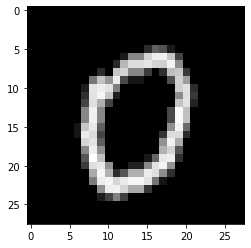

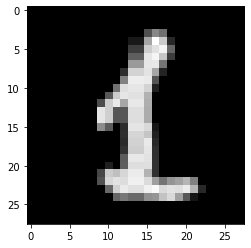

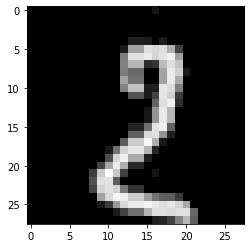

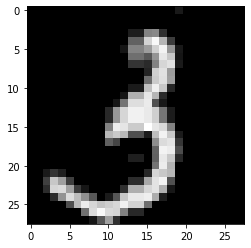

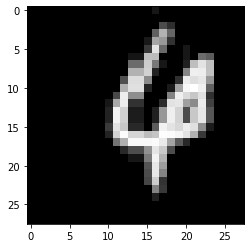

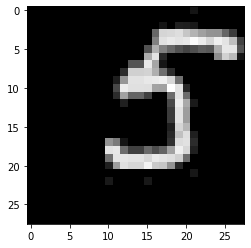

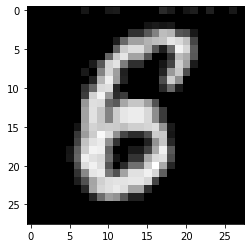

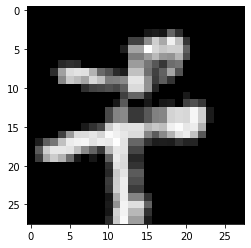

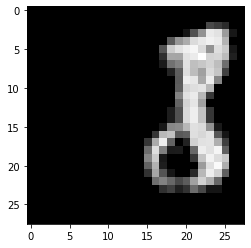

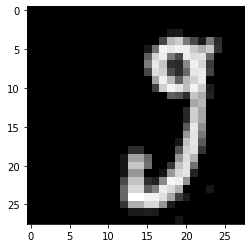

In [8]:
for i in range(10):
  for j in range(Y.shape[0]):
    if (Y[j] == i):
      plt.imshow(X[j].reshape(28,28),cmap='gray')
      plt.show()
      break

По примеру из второго урока делаю разбивку на Тренеровочный сет и Тестовый

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   shuffle = True)
x_train = (x_train.reshape(x_train.shape[0],28,28,1) )/255 
x_test = (x_test.reshape(x_test.shape[0],28,28,1) )/255
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#print(x_train[0][:50])

(2180, 28, 28, 1)
(546, 28, 28, 1)
(2180, 10)
(546, 10)


Обучение сети

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1568)              0         
                                                                 
 dense_53 (Dense)            (None, 16)              

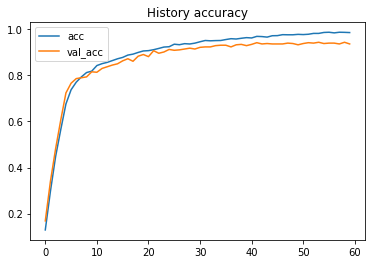

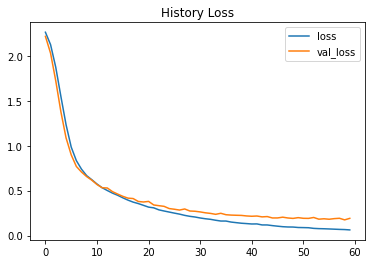

In [41]:
num_classes = 10
model= Sequential()
model.add (Conv2D(32,3,padding = 'same',input_shape = (x_train.shape[1:]),activation='relu'))
model.add (MaxPooling2D(2))
model.add (Conv2D(32,3,padding = 'same',input_shape = (x_train.shape[1:]),activation='relu'))
model.add (MaxPooling2D(2))
model.add (Flatten())
model.add (Dense(16,activation='relu'))
model.add (Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()
history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    batch_size = 32,
                    epochs = 60,
                    verbose = 1)
acc  = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot (acc,label='acc')
plt.plot (val_acc,label='val_acc')
plt.legend()
plt.title("History accuracy")
plt.show()

plt.plot (loss,label='loss')
plt.plot (val_loss,label='val_loss')
plt.legend()
plt.title("History Loss")
plt.show()

# Вывод:

По итогу мне удалось добиться точности в 95%, избежав переобучения.